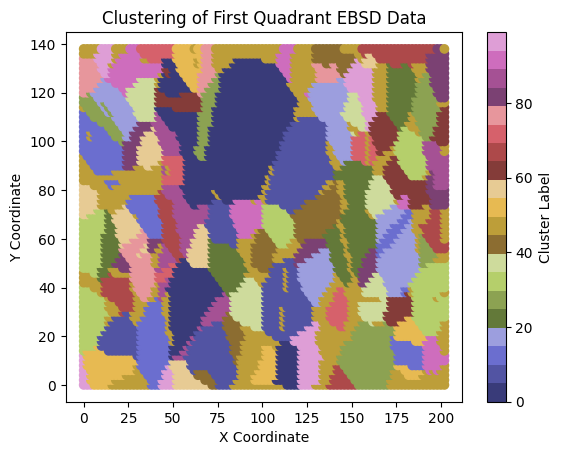

Cluster 0: 544 patterns
Cluster 1: 71 patterns
Cluster 2: 110 patterns
Cluster 3: 56 patterns
Cluster 4: 180 patterns
Cluster 5: 62 patterns
Cluster 6: 253 patterns
Cluster 7: 167 patterns
Cluster 8: 76 patterns
Cluster 9: 128 patterns
Cluster 10: 34 patterns
Cluster 11: 107 patterns
Cluster 12: 125 patterns
Cluster 13: 44 patterns
Cluster 14: 60 patterns
Cluster 15: 144 patterns
Cluster 16: 50 patterns
Cluster 17: 74 patterns
Cluster 18: 80 patterns
Cluster 19: 73 patterns
Cluster 20: 86 patterns
Cluster 21: 49 patterns
Cluster 22: 83 patterns
Cluster 23: 72 patterns
Cluster 24: 134 patterns
Cluster 25: 130 patterns
Cluster 26: 70 patterns
Cluster 27: 41 patterns
Cluster 28: 67 patterns
Cluster 29: 57 patterns
Cluster 30: 71 patterns
Cluster 31: 117 patterns
Cluster 32: 79 patterns
Cluster 33: 61 patterns
Cluster 34: 78 patterns
Cluster 35: 49 patterns
Cluster 36: 57 patterns
Cluster 37: 77 patterns
Cluster 38: 59 patterns
Cluster 39: 35 patterns
Cluster 40: 59 patterns
Cluster 41: 46

In [28]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 100  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_

cmap_custom= plt.get_cmap('tab20b')

# Step 5: Visualize the clustering results
# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')
plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Optionally, analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")

#Final code for clustering on slice (1/4) of original data set. Without adding measures to choose right amount of clusters.

In [1]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def norm_data(data):
    """ Normalize data to have mean=0 and standard_deviation=1 """
    mean_data = np.mean(data)
    std_data = np.std(data, ddof=1)
    return (data - mean_data) / std_data

def ncc(data0, data1):
    """ Normalized cross-correlation coefficient between two data sets """
    return (1.0 / (data0.size - 1)) * np.sum(norm_data(data0) * norm_data(data1))

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 178  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_

# Calculate the centroids in the coordinate space
centroids_coords = np.zeros((n_clusters, 2))
for cluster_idx in range(n_clusters):
    cluster_indices = labels == cluster_idx
    centroids_coords[cluster_idx, 0] = np.mean(X_coords_1[cluster_indices])
    centroids_coords[cluster_idx, 1] = np.mean(Y_coords_1[cluster_indices])

# Calculate evaluation metrics
silhouette_avg = silhouette_score(flattened_images_1, labels)
calinski_harabasz_avg = calinski_harabasz_score(flattened_images_1, labels)
davies_bouldin_avg = davies_bouldin_score(flattened_images_1, labels)
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")
print(f"Inertia: {inertia}")


# Print the centroids
# print("Centroids (in coordinate space):", centroids_coords)


cmap_custom = plt.get_cmap('tab20b')

# Set the figure size to 10 inches by 6 inches
plt.figure(figsize=(10, 6))

# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')

# Plot the centroids
plt.scatter(centroids_coords[:, 0], centroids_coords[:, 1], color='red', marker='x', s=100, label='Centroids')

# Annotate the centroids with their cluster indices
for i, (x, y) in enumerate(centroids_coords):
    plt.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

# Step 6: Iterate over each cluster and analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")
    
    # Perform any desired analysis or operations on cluster_patterns
    # For example, you can calculate the mean pattern of the cluster
    mean_pattern = np.mean(cluster_patterns, axis=0)
    print(f"Mean pattern for cluster {cluster_idx}: {mean_pattern}")
    
    # Calculate the NCC for each pattern in the cluster with the centroid
    centroid_pattern = kmeans.cluster_centers_[cluster_idx]
    ncc_values = [ncc(centroid_pattern, pattern) for pattern in cluster_patterns]
    mean_ncc = np.mean(ncc_values)
    print(f"Mean NCC for cluster {cluster_idx}: {mean_ncc}")
    
    #You can also visualize the mean pattern if needed
    plt.imshow(mean_pattern.reshape(img_height, img_width), cmap='gray')
    plt.title(f'Mean Pattern for Cluster {cluster_idx}')
    plt.show()


In [25]:
import numpy as np
import h5py

file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'

# Read the data
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

print(type(ebsd_data))
# Create the matrices filled with zeros
matrices = np.ones((28905, 128, 156))

# Overwrite the dataset with the new matrices
# with h5py.File(file_path, 'r+') as file:
#     data = file['/1/EBSD/Data/Processed Patterns']
#     data[:20, :50, :50] = int("255", 16)
#     print(int("0", 16))




<class 'numpy.ndarray'>


In [26]:
import h5py
import numpy as np

# Create some example data
example_data = np.array([10, 20, 30, 40, 50])

# Create an .h5oina file and save the example data into it
with h5py.File('example.h5oina', 'w') as file:
    # Create a dataset in the file
    file.create_dataset('dataset_name', data=example_data)

print("File created and data saved.")

File created and data saved.


In [27]:
import h5py
import numpy as np

# Open the .h5oina file in read/write mode
with h5py.File('example.h5oina', 'r+') as file:
    # Access the dataset
    dataset = file['dataset_name']
    
    # Print the original data
    print("Original data:", dataset[:])
    
    # Create new data to overwrite the existing data
    new_data = np.array([1, 2, 3, 4, 5])
    
    # Overwrite the data in the dataset
    dataset[:] = new_data
    
    # Print the modified data to confirm the change
    print("Modified data:", dataset[:])

Original data: [10 20 30 40 50]
Modified data: [1 2 3 4 5]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


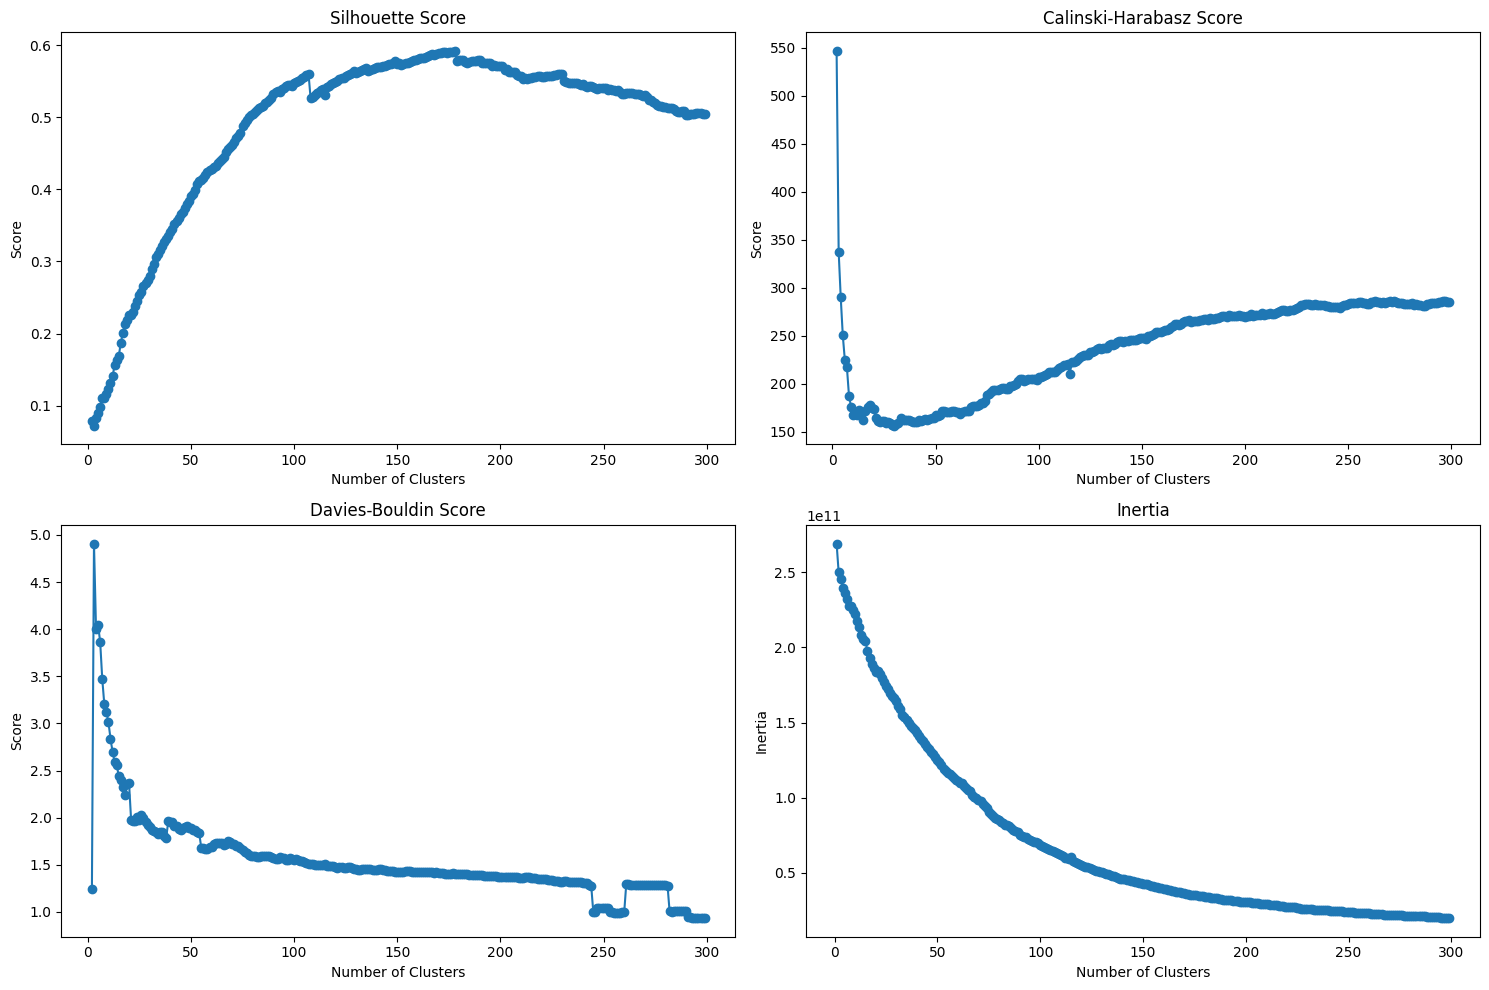

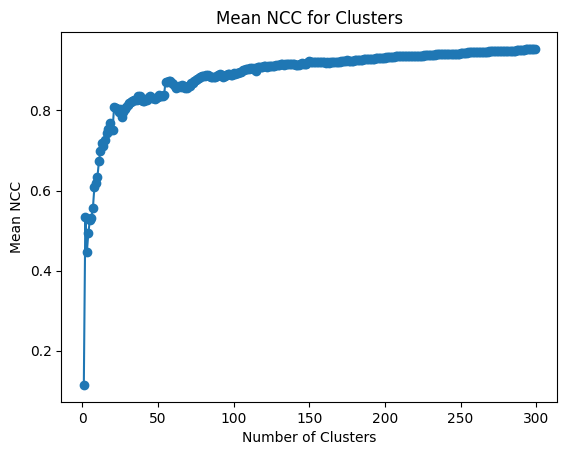

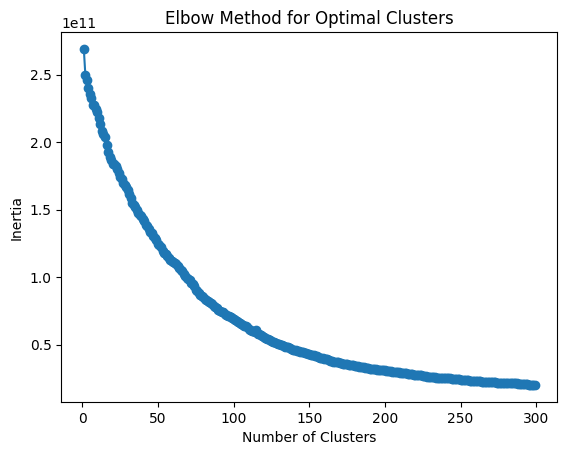

In [2]:
import h5py
import numpy as np
import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def norm_data(data):
    """ Normalize data to have mean=0 and standard_deviation=1 """
    mean_data = np.mean(data)
    std_data = np.std(data, ddof=1)
    return (data - mean_data) / std_data

def ncc(data0, data1):
    """ Normalized cross-correlation coefficient between two data sets """
    return (1.0 / (data0.size - 1)) * np.sum(norm_data(data0) * norm_data(data1))

# Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Initialize lists to store results
results = []

# Perform clustering for a range of cluster numbers
for n_clusters in range(1, 300):  # Adjusted range for elbow method
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
    labels = kmeans.labels_

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(flattened_images_1, labels) if n_clusters > 1 else None
    calinski_harabasz_avg = calinski_harabasz_score(flattened_images_1, labels) if n_clusters > 1 else None
    davies_bouldin_avg = davies_bouldin_score(flattened_images_1, labels) if n_clusters > 1 else None
    inertia = kmeans.inertia_

    # Calculate the mean NCC for each cluster
    mean_nccs = []
    for cluster_idx in range(n_clusters):
        cluster_patterns = flattened_images_1[labels == cluster_idx]
        centroid_pattern = kmeans.cluster_centers_[cluster_idx]
        ncc_values = [ncc(centroid_pattern, pattern) for pattern in cluster_patterns]
        mean_ncc = np.mean(ncc_values)
        mean_nccs.append(mean_ncc)

    # Store results
    results.append({
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': calinski_harabasz_avg,
        'davies_bouldin_score': davies_bouldin_avg,
        'inertia': inertia,
        'mean_nccs': mean_nccs
    })

# Save results to a JSON file
with open('clustering_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Plot the evaluation metrics
n_clusters_range = range(1, 300)
silhouette_scores = [result['silhouette_score'] for result in results]
calinski_harabasz_scores = [result['calinski_harabasz_score'] for result in results]
davies_bouldin_scores = [result['davies_bouldin_score'] for result in results]
inertias = [result['inertia'] for result in results]

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(2, 2, 2)
plt.plot(n_clusters_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
plt.plot(n_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.plot(n_clusters_range, inertias, marker='o')
plt.title('Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Plot the mean NCC for clusters
mean_nccs_all = [np.mean(result['mean_nccs']) for result in results]
plt.figure()
plt.plot(n_clusters_range, mean_nccs_all, marker='o')
plt.title('Mean NCC for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean NCC')
plt.show()

# Elbow plot for inertia
plt.figure()
plt.plot(n_clusters_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()